In [ ]:
import pandas as pd

In [ ]:
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = fetch_california_housing()

In [ ]:
dataset = pd.DataFrame(df.data, columns=df.feature_names)

In [ ]:
print(dataset.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [ ]:
df = fetch_california_housing()

In [ ]:
## Independent features and dependent feature
x=dataset
y=df.target

In [ ]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
## train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size=0.30, random_state=42)

In [ ]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [ ]:
## Standardizin the dataset
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [ ]:
!pip install -U scikit-learn  # Run this if you still face issues


In [ ]:
x_train =  Scaler.fit_transform(x_train)


In [ ]:
x_test = Scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
## cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
#mse = mean squre erroe
mse=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [ ]:
np.mean(mse)

-0.5268253746355748

In [ ]:
##prediction
reg_pred=regression.predict(x_test)

In [ ]:
reg_pred

array([-37.84741618, -37.11081487, -36.70791505, ..., -37.08104512,
       -37.25035096, -37.28768464])

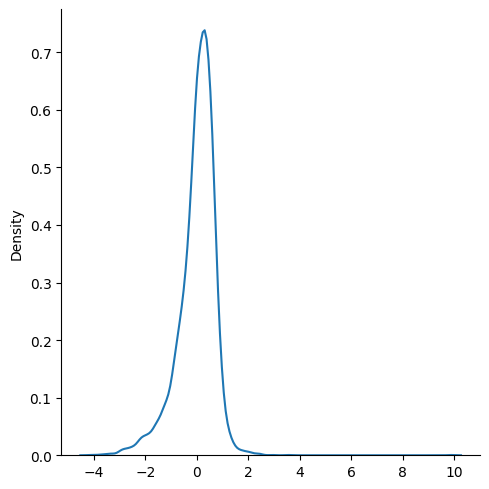

In [ ]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score=r2_score(reg_pred,y_test)

In [ ]:
score

-1902.4245664178848

In [ ]:
## Ridge And Lasso Practical Implementation

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge_regression=Ridge()

In [ ]:
ridge_regression

Ridge()

In [ ]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regression,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridgecv.best_params_)


{'alpha': 5}


In [ ]:
print(ridgecv.best_score_)

-0.5268179966861514


In [ ]:
ridge_pred=ridgecv.predict(x_test)

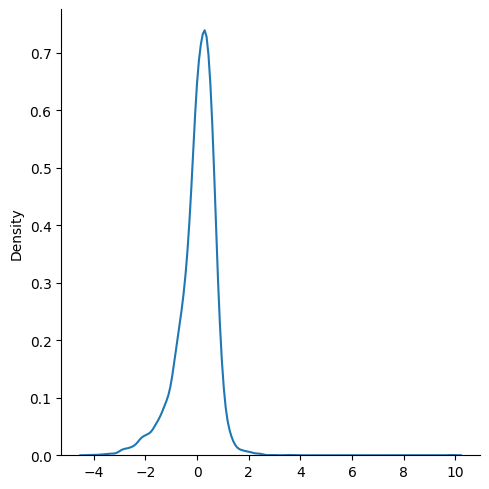

In [ ]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

In [ ]:
from sklearn.metrics import r2_score


In [ ]:
score=r2_score(ridge_pred,y_test)

In [ ]:
score

0.34383945441404484

In [ ]:
## Lasso Regression
from sklearn.linear_model import Lasso

In [ ]:
lasso=Lasso()

In [ ]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-1.3400019579636542


In [ ]:
lasso_pred=ridgecv.predict(x_test)

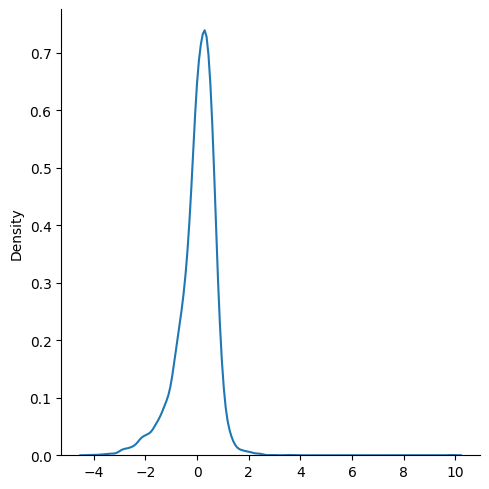

In [ ]:
import seaborn as sns
sns.displot(lasso_pred-y_test,kind='kde')